# How to Build a Machine Learning Model in Python

## Learning Objectives
In the modeling stage of the machine learning process, our goal is to choose and apply the appropriate machine learning approach that works with the data we have and solves the problem that we intend to solve. If our objective is to build a model that predicts a numeric or continuous value, then our problem is known as a regression problem. One of the most common models used in solving regression problems is **Linear Regression**. By the end of the tutorial, you will have learned:

+ how to collect, explore and prepare data
+ how to build and evaluate a model

## 1. Collect the Data

In [21]:
# In this exercise, we'll use a historical data set, to build a linear regression model that predicts the number 
# of bike rentals. Based on weather conditions. 
# We start by importing the Panda's package. 
# Then we import the data into a data frame called bikes and preview it.

import pandas as pd
bikes = pd.read_csv("bikes.csv")
bikes.head()

,temperature,humidity,windspeed,rentals
0,46.716528,0.815969,13.669663,985
1,48.350239,0.800497,15.199782,801
2,34.212394,0.592097,13.247558,1349
3,34.520000,0.623196,11.687963,1562
4,36.800562,0.624643,13.148281,1600


## 2. Explore the Data

In [3]:
# Now that we have our data, let's try to understand it. 
# First, we get a concise summary of the structure of the data. 
# From the summary. We can tell that there are 731 rows in the data set and that all four columns are numeric. 

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  731 non-null    float64
 1   humidity     731 non-null    float64
 2   windspeed    731 non-null    float64
 3   rentals      731 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 23.0 KB


In [4]:
# Next, we get summary statistics for the data. The statistics show the mean minimum, maximum, standard deviation
# and present our values for the four features in the dataset

bikes.describe()

,temperature,humidity,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000
mean,59.509553,0.486937,9.238886,4504.348837
std,15.486114,0.185415,3.379815,1937.211452
min,22.602432,0.000000,0.932208,22.000000
25%,46.117264,0.353548,6.863568,3152.000000
50%,59.758972,0.502227,9.503508,4548.000000
75%,73.048236,0.624671,11.814559,5956.000000
max,90.497028,0.972500,21.126627,8714.000000


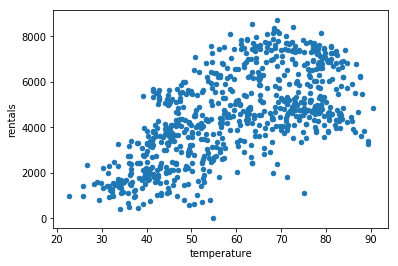

In [6]:
# Linear regression models assume that, there exists a linear relationship between the predictors and the response.
# Let's see if this assumption holds true in our dataset. To ensure that our plot show up in line,
# we run the map plot lib inline command. 
# Then we create a scatter plot, between the predictive variable temperature, and the response variable rentals.

%matplotlib inline
bikes.plot(kind = 'scatter', x = 'temperature', y = 'rentals')

# The chart shows that there is a positive linear relationship between temperature and rentals. 
# This means that as the temperature increases, so does the number of bike rentals. 

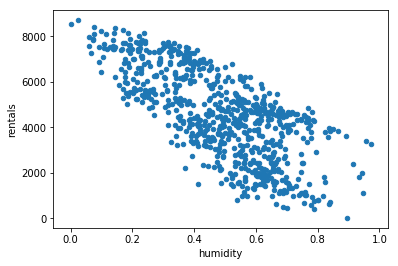

In [7]:
# Next, we evaluate the relationship between humidity and rentals. 
# This chart shows that there is a negative, linear relationship between humidity and rentals. 
# This means that as humidity increases, the number of bike rentals decreases, 

bikes.plot(kind = 'scatter', x = 'humidity', y = 'rentals')

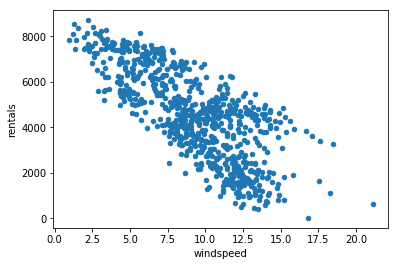

In [10]:
# finally, we evaluate the relationship between wind speed and rentals. 
# The chart also shows a negative linear relationship between wind speed and rentals. 
# This means that the number of bike rentals decreases, as wind speed and picks up.

bikes.plot(kind = 'scatter', x = 'windspeed', y = 'rentals')

## 3. Prepare the Data

In [11]:
# before we build our machine learning model, we need to split the data into training and test sets,
# prior to doing this, we must first separate the dependent variable, from the independent variables. 
# Let's start by creating a data frame called Y, for the dependent variable.

response = 'rentals'
y = bikes[[response]]
y

,rentals
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


In [12]:
# Then we split off the independent variables, into a data frame called X.

predictors = list(bikes.columns)
predictors.remove(response)
x = bikes[predictors]
x

,temperature,humidity,windspeed
0,46.716528,0.815969,13.669663
1,48.350239,0.800497,15.199782
2,34.212394,0.592097,13.247558
3,34.520000,0.623196,11.687963
4,36.800562,0.624643,13.148281
...,...,...,...
726,39.102528,0.482493,10.801229
727,39.031972,0.480433,8.996301
728,39.031972,0.717730,11.829425
729,39.243472,0.523039,12.805314


In [13]:
# Next, We import the train test split function, from the SK learn model selection sub package, 
# then we split the X and Y data frames into X train X test, Y train and Y test.


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1234) 

## 4. Train the Model

In [15]:
# to build a linear regression model in Python, we need to import the linear regression class, 
# from the SK learn linear model sub package. 
# We then use the function to build our model. So we use a linear regression function, within the function we call
# the fit method of the function, and we pass to it X train, and Y train.

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [16]:
# the objective of linear regression is to estimate, the intercept and slope values for a regression line,
# that best fits the data. 
# We can get the estimated intercept value for a model by referring to the intercept attributes of the model. 
# The intercept value for our regression line is 3800.68. 

model.intercept_

array([3800.68469948])

In [17]:
# We can also get the estimated slope values, or coefficients for the regression line by referring to the 
# co-ef attributes of the model.
# the model coefficients correspond the order, in which the independent variables are listed, in the training data.
# This means that the coefficient for temperature is 80.35. The coefficient for humidity is negative 4665.74. 
# And the coefficient for wind speed is negative 196.22.

model.coef_

array([[   80.35314543, -4665.73867387,  -196.21650368]])

The model coefficients correspond to the order in which the independent variables are listed in the training data. This means that the equation for the fitted regression line can be written as:

$y = 3800.68 + 80.35 \times temperature - 4665.74 \times humidity - 196.22 \times windspeed$

With the linear regression equation, we can estimate what our model will predict given any weather condition. For example, given a temperature of $72^{\circ}F$, $22\%$ humidity and windspeed of $5$ miles per hour, our model would predict:

$7,578 \text{ bikes} \approx 3800.68 + 80.35 \times 72 - 4665.74 \times .22 - 196.22 \times 5$


## 5. Evaluate the Model

In [18]:
# one way to evaluate a linear regression model, is by calculating the coefficient of determination, or R squared.
# The closer this metric is to one, the better the model is. 

# Let's get the R squared for a model. 
# We call this score method of the model and we pass to it X test, as well as Y test. 
# The R squared value tells us that our model is able to explain 98.2% of the variability in the response values,
# of the test data. That is very good. 

model.score(x_test, y_test)

0.9820623857913312

In [20]:
# Another way to evaluate a linear regression model, is to evaluate how accurate it is. 
# This means comparing the predicted values, against the actual values. 
# First let's get the models predicted response values, for the test data. 
# We're going to call our predictions, y pred and we get the models predictions by calling the predict method
# of the model and we pass to it, X test.

y_pred = model.predict(x_test)

In [24]:
# Next, we import the mean absolute error function, from the SK Learn that metrics sub package and
# calculate the mean absolute error, between the actual response values, and the predicted response values. 
# So mean absolute error function, passed to it Y, underscore test. Then we can pass to it Y, underscore pred.

# The mean absolute error implies that going forward. We should expect the predictions of our model, 
# to be off the mark by an average of plus or minus 194 bikes. That's pretty good. 
# Considering the little amount of work we put into a model.

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

194.31620720519683